# Cell line Huh7

# Imports data structuring

In [ ]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# CNN template import

In [ ]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Documents from different files will be stored in this directory

In [ ]:
diretorio = './../../results/results_Huh7' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> lista_img_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
1 -> lista_rotulo_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
2 -> lista_img_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
3 -> lista_rotulo_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
4 -> lista_img_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
5 -> lista_rotulo_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
6 -> model_A549_samehuh7_img2021-10-26.h5
7 -> model_huh7_samehuh7_img2021-10-26.h5
8 -> model__3T3_samehuh7_img2021-10-26.h5
9 -> model_A549_samehuh7_img_40_602021-10-27.h5
10 -> model_huh7_samehuh7_img_40_602021-10-27.h5
11 -> model__3T3_samehuh7_img_40_602021-10-27.h5
12 -> lista_img_camp_clar_100_resized_regressao_A5492021-11-9.gz
13 -> lista_rotulo_camp_clar_100_resized_regressao_A5492021-11-9.gz
14 -> lista_img_camp_clar_75_resized_regressao_A5492021-11-9.gz
15 -> lista_rotulo_camp_clar_75_resize

Lists of all images in each file

In [ ]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados):
    if k in [20,22,24,27]: #atualizar
        print(f'{k} -> {v}')

20 -> lista_img_camp_clar_100_resized_regressao_huh72021-11-9.gz
22 -> lista_img_camp_clar_75_resized_regressao_HUH72021-11-9.gz
24 -> lista_img_camp_clar_50_resized_regressao_HUH72021-11-9.gz
27 -> lista_img_camp_clar_25_resized_regressao_HUH72021-11-9.gz


## x = features/images

In [ ]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[20])

X_setcin = joblib.load(diretorio+ '/' + lista_dados[22])

X_cinq = joblib.load(diretorio+ '/' + lista_dados[24])

X_vincin = joblib.load(diretorio+ '/' + lista_dados[27])

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin))

x.shape

(704, 200, 200, 3)

Vamos definir nossos rótulos (y)

## y = labels

Opening the labels that were saved in the preparation of the images

In [ ]:
for k, v in enumerate(lista_dados):
    if k in [21,23,25,26]: #atualizar
        print(f'{k} -> {v}')

21 -> lista_rotulo_camp_clar_100_resized_regressao_huh72021-11-9.gz
23 -> lista_rotulo_camp_clar_75_resized_regressao_HUH72021-11-9.gz
25 -> lista_rotulo_camp_clar_50_resized_regressao_HUH72021-11-9.gz
26 -> lista_rotulo_camp_clar_25_resized_regressao_HUH72021-11-9.gz


In [ ]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[21])

y_setcin = joblib.load(diretorio+ '/' + lista_dados[23])

y_cinq = joblib.load(diretorio+ '/' + lista_dados[25])

y_vincin = joblib.load(diretorio+ '/' + lista_dados[26])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(704,)

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Test and training separation from a library.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(492, 200, 200, 3) 
(212, 200, 200, 3) 
(492,) 
(212,)


In [ ]:
#data = timeProcess()[1]

In [ ]:
#joblib.dump(X_train, '/content/drive/MyDrive/1_Informações_scripts//3_images_de_X_train_huh7_melhor_modelo_500_epochs_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//3_images_de_X_train_huh7_melhor_modelo_500_epochs_2022-6-30.gz']

In [ ]:
#joblib.dump(y_train, '/content/drive/MyDrive/1_Informações_scripts//3_images_de_y_train_huh7_melhor_modelo_500_epochs_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//3_images_de_y_train_huh7_melhor_modelo_500_epochs_2022-6-30.gz']

In [ ]:
#joblib.dump(X_test, '/content/drive/MyDrive/1_Informações_scripts//4_images_de_X_test_huh7_melhor_modelo_500_epochs_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//4_images_de_X_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz']

In [ ]:
#joblib.dump(y_test, '/content/drive/MyDrive/1_Informações_scripts//4_images_de_y_test_huh7_melhor_modelo_500_epochs_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//4_images_de_y_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz']

### Model determination


In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

# Training and testing epochs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [ ]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=500, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/500
16/16 - 13s - loss: 131837.4219 - mean_squared_error: 131837.4219 - val_loss: 87182.5156 - val_mean_squared_error: 87182.5156 - 13s/epoch - 796ms/step
Epoch 2/500
16/16 - 1s - loss: 113964.4453 - mean_squared_error: 113964.4453 - val_loss: 83814.0781 - val_mean_squared_error: 83814.0781 - 763ms/epoch - 48ms/step
Epoch 3/500
16/16 - 1s - loss: 104258.3750 - mean_squared_error: 104258.3750 - val_loss: 81588.8906 - val_mean_squared_error: 81588.8906 - 763ms/epoch - 48ms/step
Epoch 4/500
16/16 - 1s - loss: 99233.2344 - mean_squared_error: 99233.2344 - val_loss: 78046.7422 - val_mean_squared_error: 78046.7422 - 773ms/epoch - 48ms/step
Epoch 5/500
16/16 - 1s - loss: 92431.2188 - mean_squared_error: 92431.2188 - val_loss: 75220.0312 - val_mean_squared_error: 75220.0312 - 761ms/epoch - 48ms/step
Epoch 6/500
16/16 - 1s - loss: 104104.6875 - mean_squared_error: 104104.6875 - val_loss: 82964.0938 - val_mean_squared_error: 82964.0938 - 787ms/epoch - 49ms/step
Epoch 7/500
16/16 - 1s - l

In [ ]:
# #rodadas de treinamento
# history = modelo.fit(
#                         X_train,
#                         y_train,
#                         validation_data=(X_test, y_test),
#                         epochs=50,
#                         batch_size=12
#                     )

In [ ]:
#modelo.save('/content/drive/MyDrive/1_Informações_scripts//model__huh7_regressao_menor_erro_Mean_squared_error_500_epochs'+data+'.h5')

## Accuracy Assessment

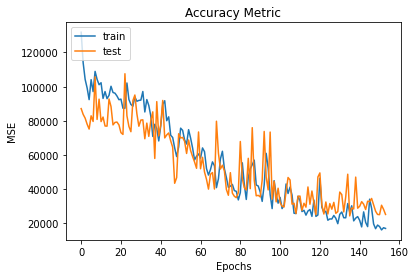

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

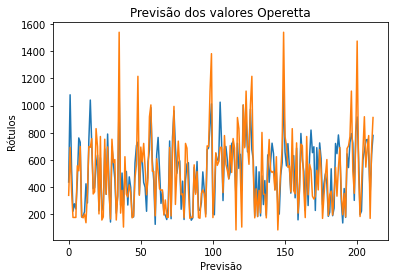

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')
plt.plot(prev)
plt.plot(y_test)
plt.show()

# Qualit model analisys

In [ ]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_error(y_test, prev), 2)} Erro médio quadrático")



67.46% r2_score
115.14 Erro médio absoluto
25295.23 Erro médio quadrático


In [ ]:
mean_absolute_error(y_test, prev)

160.07656363721165

In [ ]:
print(f"{round(mean_absolute_error(y_test, prev), 2)}")


160.08


In [ ]:
print(f"{round(mean_squared_error(y_test, prev), 2)}")


50061.38
